In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def conv2d(x, weights, biases, activation_function=None):
    h_conv2d = tf.nn.conv2d(x, weights, strides=[1,1,1,1], padding='SAME')        
    result = h_conv2d + biases
    
    if activation_function:
        return activation_function(result)
    else:
        return result
    
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

def add_layer(x, weights, biases, keep_prob, activation_function=None):
    result = tf.matmul(x, weights) + biases
    
    if activation_function:
        return tf.nn.dropout(activation_function(result), keep_prob)
    else:
        return tf.nn.dropout(result, keep_prob)

def init_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

def init_biases(shape):
    return tf.Variable(tf.zeros(shape) + 0.1)

In [4]:
BATCH_SIZE = 100
LEARNING_RATE = 1e-3
TRAINING_ITER = 1000
KEEP_PROB = 0.5

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

weights = {
    'conv1': init_weights([5,5,1,32]),
    'conv2': init_weights([5,5,32,64]),
    'fc1': init_weights([7 * 7 * 64, 1024]),
    'fc2': init_weights([1024, 10])
}

biases = {
    'conv1': init_biases([32]),
    'conv2': init_biases([64]),
    'fc1': init_biases([1024]),
    'fc2': init_biases([10])
}


x_images = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = conv2d(x_images, weights['conv1'], biases['conv1'], tf.nn.relu)
h_pool1 = max_pool_2x2(h_conv1)

h_conv2 = conv2d(h_pool1, weights['conv2'], biases['conv2'], tf.nn.relu)
h_pool2 = max_pool_2x2(h_conv2)

h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])

h_fc1 = add_layer(h_pool2_flat, weights['fc1'], biases['fc1'], keep_prob, tf.nn.relu)

predictions = add_layer(h_fc1, weights['fc2'], biases['fc2'], 1.0, None)

In [5]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))

train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(predictions, 1), tf.arg_max(y, 1)), tf.float32))

init = tf.global_variables_initializer()

In [6]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

epoch = []
train_acc = []
valid_acc = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(TRAINING_ITER):
        batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
        
        sess.run(train_step, feed_dict = {x: batch_xs, y: batch_ys, keep_prob: 1.0})
        
        if i % 50 == 0:
            epoch.append(i)
            
            train_accuracy = sess.run(accuracy, feed_dict = {x: batch_xs, y: batch_ys, keep_prob: 1.0})
            print 'TRAIN_ACC@%d:' %i, train_accuracy
            train_acc.append(train_accuracy)
            
            valid_accuracy = sess.run(accuracy, feed_dict = {x: mnist.validation.images, y: mnist.validation.labels, keep_prob: 1.0})
            print 'VALID_ACC@%d:' %i, valid_accuracy
            valid_acc.append(valid_accuracy)
            
    print 'TEST_ACC:', sess.run(accuracy, feed_dict = {x: mnist.test.images, y:mnist.test.labels, keep_prob: 1.0})
    
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')

plt.plot(epoch, train_acc, 'r-')
plt.plot(epoch, valid_acc, 'b-')


TRAIN_ACC@0: 0.12
VALID_ACC@0: 0.1026
TRAIN_ACC@50: 0.89
VALID_ACC@50: 0.888
TRAIN_ACC@100: 0.95
VALID_ACC@100: 0.9468
TRAIN_ACC@150: 0.95
VALID_ACC@150: 0.9698
TRAIN_ACC@200: 0.98
VALID_ACC@200: 0.9738
TRAIN_ACC@250: 0.97
VALID_ACC@250: 0.9734
TRAIN_ACC@300: 0.99
VALID_ACC@300: 0.9774
TRAIN_ACC@350: 0.99
VALID_ACC@350: 0.9716
TRAIN_ACC@400: 0.99
VALID_ACC@400: 0.9772
TRAIN_ACC@450: 1.0
VALID_ACC@450: 0.9724
TRAIN_ACC@500: 0.99
VALID_ACC@500: 0.9756
TRAIN_ACC@550: 0.99
VALID_ACC@550: 0.9814
TRAIN_ACC@600: 0.97
VALID_ACC@600: 0.9828
TRAIN_ACC@650: 0.99
VALID_ACC@650: 0.983
TRAIN_ACC@700: 1.0
VALID_ACC@700: 0.9828
TRAIN_ACC@750: 0.99
VALID_ACC@750: 0.9872
TRAIN_ACC@800: 0.99
VALID_ACC@800: 0.985
TRAIN_ACC@850: 1.0
VALID_ACC@850: 0.9858
TRAIN_ACC@900: 1.0
VALID_ACC@900: 0.9876
TRAIN_ACC@950: 1.0
VALID_ACC@950: 0.9874
TEST_ACC: 0.9856


TRAIN_ACC@0: 0.15
VALID_ACC@0: 0.1012
TRAIN_ACC@50: 0.89
VALID_ACC@50: 0.9392
TRAIN_ACC@100: 0.97
VALID_ACC@100: 0.9652
TRAIN_ACC@150: 0.99
VALID_ACC@150: 0.9692
TRAIN_ACC@200: 0.97
VALID_ACC@200: 0.9668
TRAIN_ACC@250: 1.0
VALID_ACC@250: 0.9702
TRAIN_ACC@300: 0.97
VALID_ACC@300: 0.9814
TRAIN_ACC@350: 0.98
VALID_ACC@350: 0.9808
TRAIN_ACC@400: 0.98
VALID_ACC@400: 0.9846
TRAIN_ACC@450: 0.98
VALID_ACC@450: 0.9826
TRAIN_ACC@500: 0.97
VALID_ACC@500: 0.9846
TRAIN_ACC@550: 0.98
VALID_ACC@550: 0.9774
TRAIN_ACC@600: 0.96
VALID_ACC@600: 0.9864
TRAIN_ACC@650: 1.0
VALID_ACC@650: 0.9842
TRAIN_ACC@700: 1.0
VALID_ACC@700: 0.9862
TRAIN_ACC@750: 1.0
VALID_ACC@750: 0.9854
TRAIN_ACC@800: 1.0
VALID_ACC@800: 0.9884
TRAIN_ACC@850: 0.97
VALID_ACC@850: 0.9862
TRAIN_ACC@900: 0.99
VALID_ACC@900: 0.9848
TRAIN_ACC@950: 1.0
VALID_ACC@950: 0.9868
TEST_ACC_DROPOUT: 0.9871


<IPython.core.display.Javascript object>


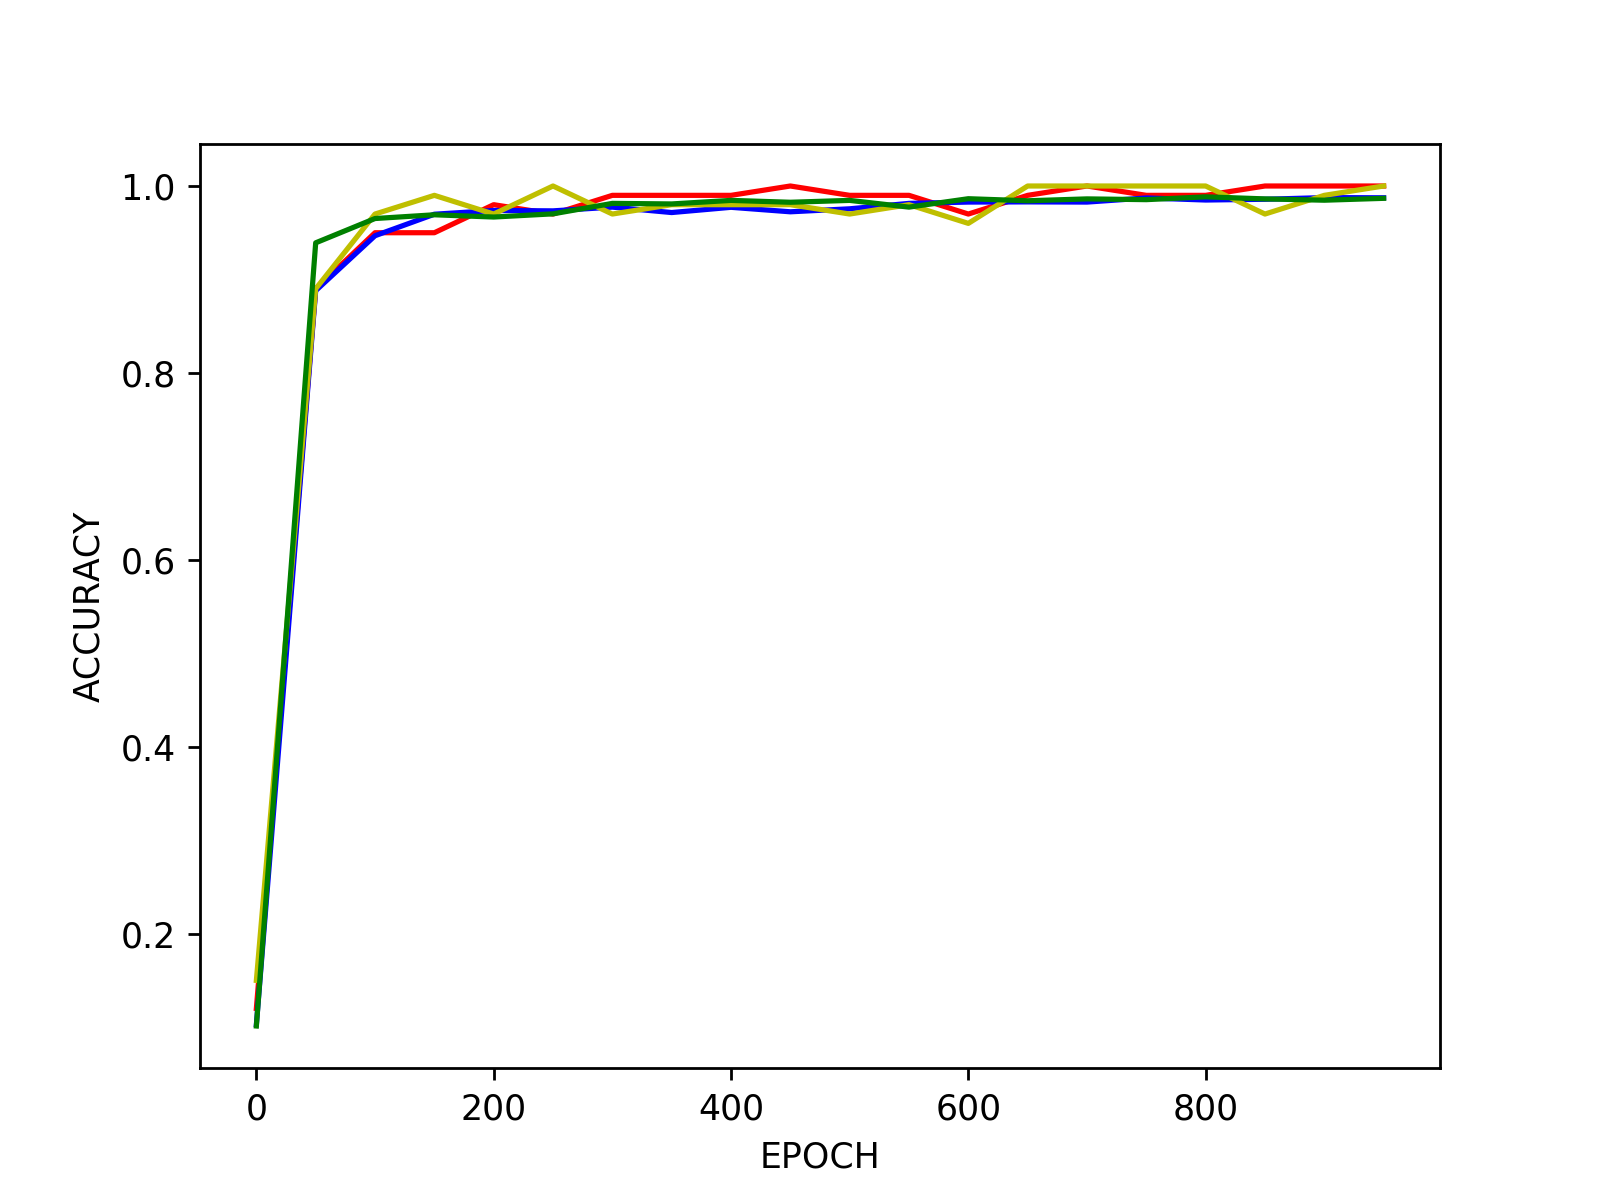

In [7]:
epoch = []
train_acc = []
valid_acc = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(TRAINING_ITER):
        batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
        
        sess.run(train_step, feed_dict = {x: batch_xs, y: batch_ys, keep_prob: KEEP_PROB})
        
        if i % 50 == 0:
            epoch.append(i)
            
            train_accuracy = sess.run(accuracy, feed_dict = {x: batch_xs, y: batch_ys, keep_prob: 1.0})
            print 'TRAIN_ACC@%d:' %i, train_accuracy
            train_acc.append(train_accuracy)
            
            valid_accuracy = sess.run(accuracy, feed_dict = {x: mnist.validation.images, y: mnist.validation.labels, keep_prob: 1.0})
            print 'VALID_ACC@%d:' %i, valid_accuracy
            valid_acc.append(valid_accuracy)
            
    print 'TEST_ACC_DROPOUT:', sess.run(accuracy, feed_dict = {x: mnist.test.images, y:mnist.test.labels, keep_prob: 1.0})
    
plt.plot(epoch, train_acc, 'y-')
plt.plot(epoch, valid_acc, 'g-')

plt.show()